In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
nowcast_tracer_path = "/results/SalishSea/nowcast-green/12apr16/SalishSea_1h_20160412_20160412_ptrc_T.nc"
diat_iopt_84_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/apr12_double_iopt_diat/SalishSea_1h_20160412_20160412_ptrc_T.nc"

n_grid_t = xr.open_dataset(nowcast_tracer_path)
m_grid_t = xr.open_dataset(diat_iopt_84_tracer_path)

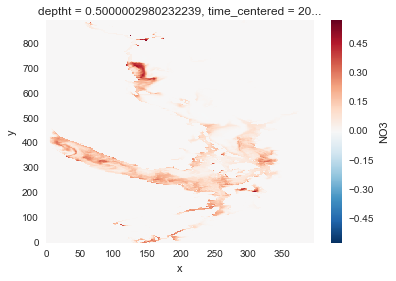

In [6]:
((m_grid_t["NO3"] - n_grid_t["NO3"]).isel(deptht = 0, time_counter = 12)).plot()

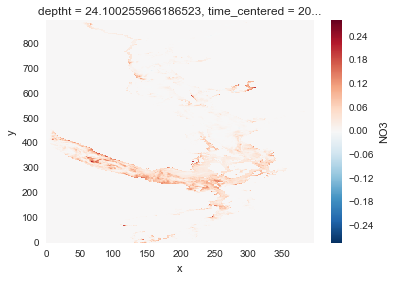

In [7]:
((m_grid_t["NO3"] - n_grid_t["NO3"]).isel(deptht = 20, time_counter = 12)).plot()

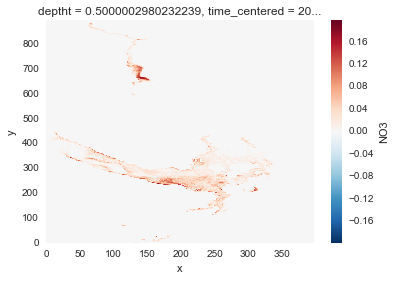

In [18]:
((m_grid_t["NO3"] - n_grid_t["NO3"]).isel(deptht = 0, time_counter = 1)).plot()

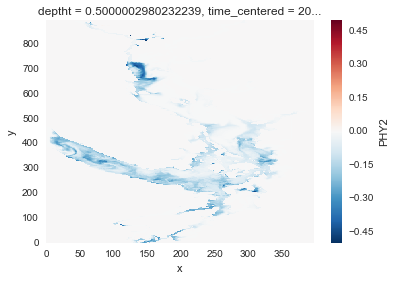

In [19]:
((m_grid_t["PHY2"] - n_grid_t["PHY2"]).isel(deptht = 0, time_counter = 12)).plot()

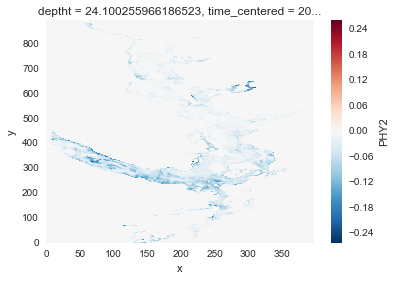

In [23]:
((m_grid_t["PHY2"] - n_grid_t["PHY2"]).isel(deptht = 20, time_counter = 12)).plot()

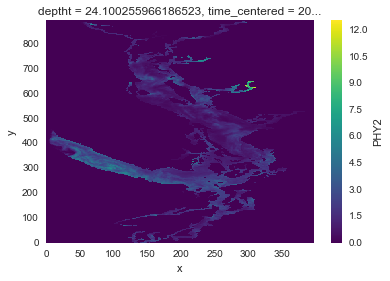

In [24]:
(n_grid_t["PHY2"].isel(deptht = 20, time_counter = 12)).plot()

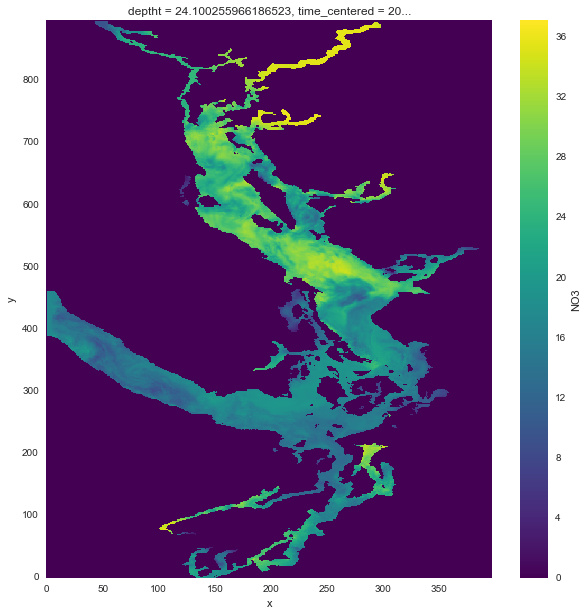

In [30]:
fig, ax = plt.subplots(figsize = (10,10))

(n_grid_t["NO3"].isel(deptht = 20, time_counter = 12)).plot(ax = ax)

In [3]:
# Have to keep this and the next cell apart or it fails with memory error. Something to do with 
# Jupyter notebook caching
tracer = "PHY2"
mod_tracer_depth_time =  m_grid_t[tracer].where(m_grid_t["O2"] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)

In [27]:
now_tracer_depth_time =  n_grid_t[tracer].where(n_grid_t["O2"] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)
var_name = "MEAN_" + tracer

In [5]:
mod_tracer_depth_time["DATA_SOURCE"] = "IOPT DIAT = 84"
now_tracer_depth_time["DATA_SOURCE"] = "Nowcast"
combined = pd.concat([mod_tracer_depth_time, now_tracer_depth_time])
combined.reset_index(inplace=True)

In [6]:
%load_ext rpy2.ipython

In [21]:
%%R 
require(ggplot2)
require(data.table)
library(repr)

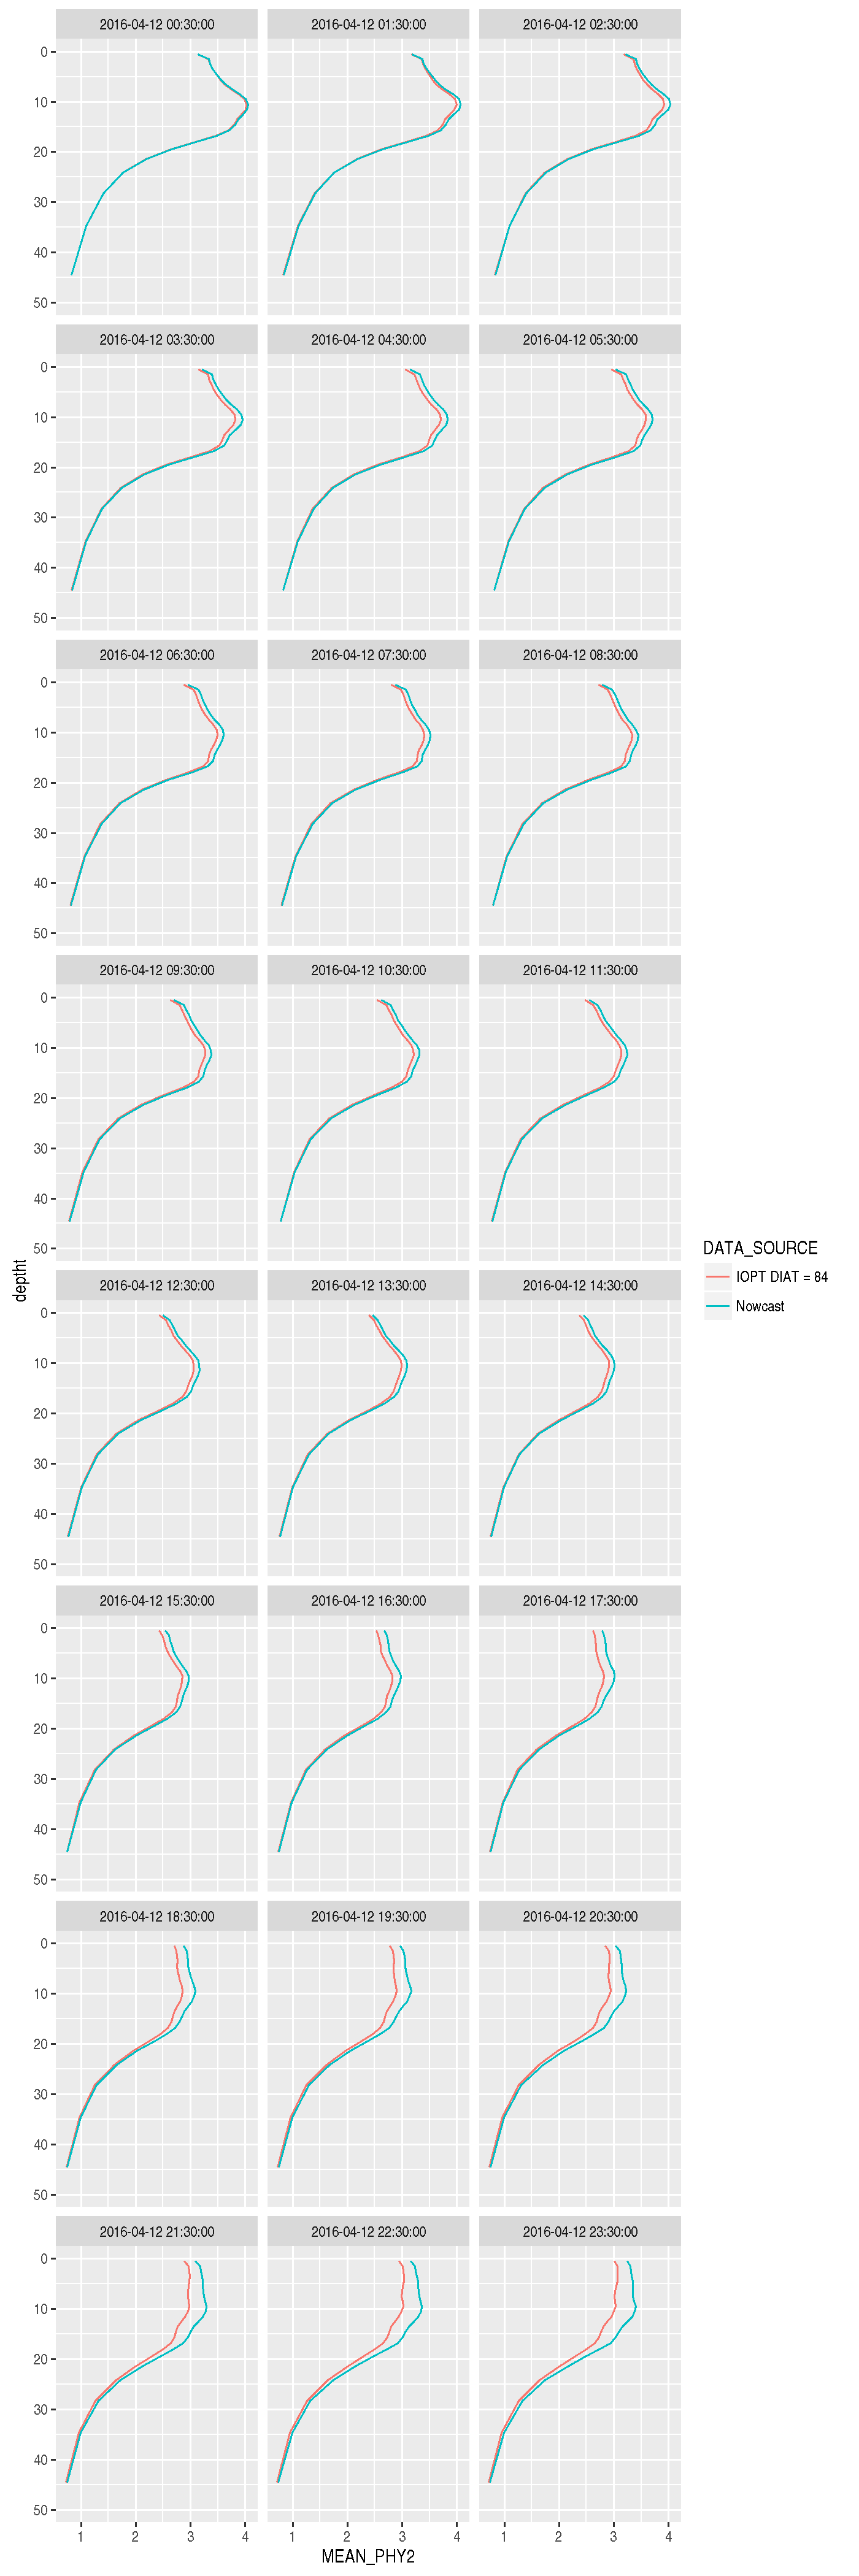

In [45]:
%%R -i combined,var_name -h 4200 -w 1400 -r 200
combined = data.table(combined)
ggplot(combined[deptht < 50,  ], aes_string(y = "deptht", x = var_name, colour = "DATA_SOURCE")) + 
    geom_path() + ylim(50,0) +
    facet_wrap(~time_counter, ncol = 3)